In [10]:
import torch
from torch import nn
import torchvision
from torch.utils.data import Subset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cnn
import numpy as np
from datetime import datetime
import os 

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed = 1

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

val_idx = [i for i in range(7000)]
test_idx = [i for i in range(10_000)]

valset = torch.utils.data.Subset(testset, val_idx)
testset = torch.utils.data.Subset(testset, test_idx)


valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


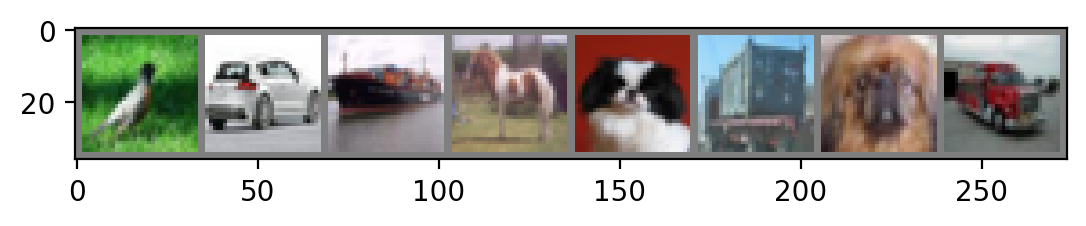

bird  car   ship  horse dog   truck dog   truck


In [12]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
vgg = cnn.VGG(in_channels=3, batchnorm=False, dropout=True)
vgg.to(device)
criterion = nn.CrossEntropyLoss()
lr = 2e-3
epochs = 100
momentum = 0.9
optimizer = torch.optim.SGD(params=vgg.parameters(), momentum=momentum, lr=lr)
trainer = cnn.Trainer(model=vgg, train_dataloader=trainloader, val_dataloader=valloader, criterion=criterion, optimizer=optimizer, device=device, log_dir="check_overfits_small_train/", obj_performance=0.80)

path = 'models/vanilla_vgg_dropout_only/dropout_explo/lr_' + str(lr) + '_increasing_dropout_' 'bs_' + str(batch_size) + '_m_' + str(momentum) + '_n_epoch_' + str(epochs) + '_' + str(datetime.now()).replace(' ', '_').replace(':', '_').replace('.', '-')[:16]

train_loss_list, train_acc_list, val_loss_list, val_acc_list = trainer.train(epochs=epochs)

path += '_' + str(max(val_acc_list))[:5]
model_path = path + '_model.pth'
train_loss_path = path + '_train_loss.npy'
val_loss_path = path + '_val_loss.npy'
train_acc_path = path + '_train_acc.npy'
val_acc_path = path + '_val_acc.npy'

train_loss_list = np.array(train_loss_list)
train_acc_list = np.array(train_acc_list)
val_loss_list = np.array(val_loss_list)
val_acc_list = np.array(val_acc_list)

# Save all the model's output and the model

torch.save(vgg, model_path)

with open(train_loss_path, 'wb') as f:
    np.save(f, train_loss_list)

with open(val_loss_path, 'wb') as f:
    np.save(f, val_loss_list)

with open(train_acc_path, 'wb') as f:
    np.save(f, train_acc_list)

with open(val_acc_path, 'wb') as f:
    np.save(f, val_acc_list)

VGG model with dropout


  1%|          | 1/100 [00:53<1:28:30, 53.65s/it]

Epoch 1/100: Train Loss = 2.3026, Train Accuracy = 0.1273, Val Loss = 2.3026, Val Accuracy = 0.1574


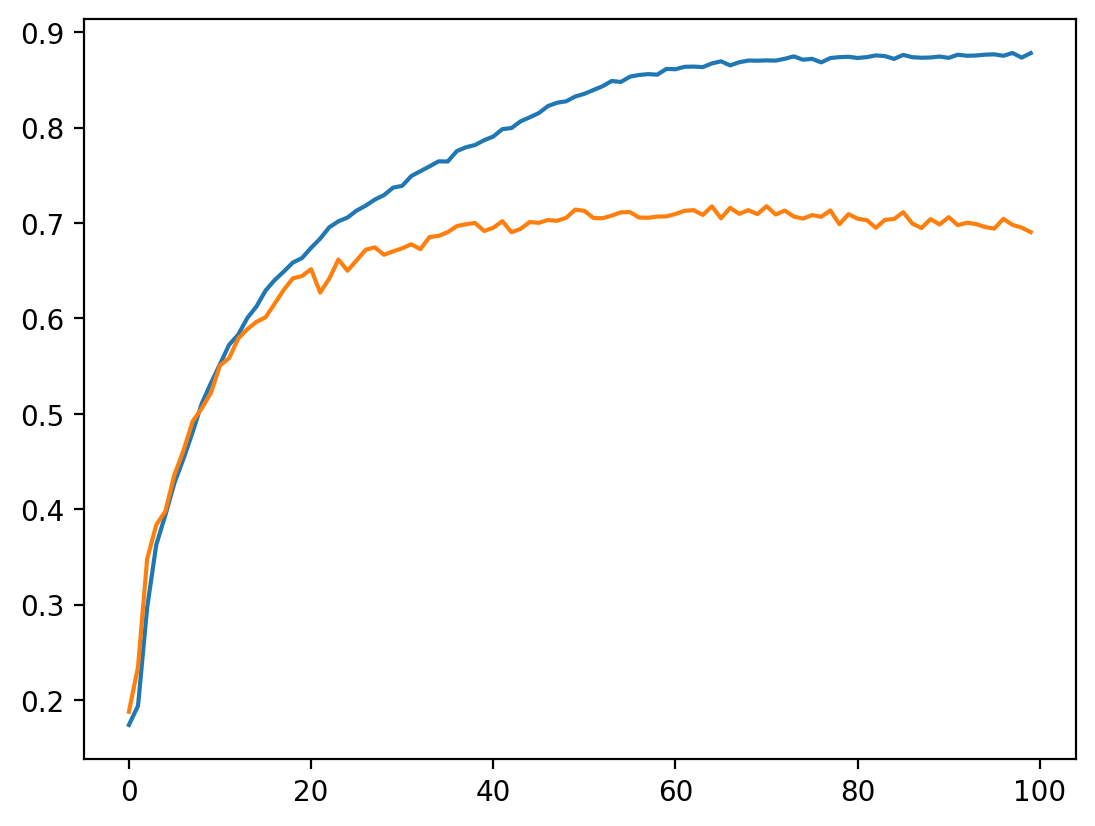

In [7]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)

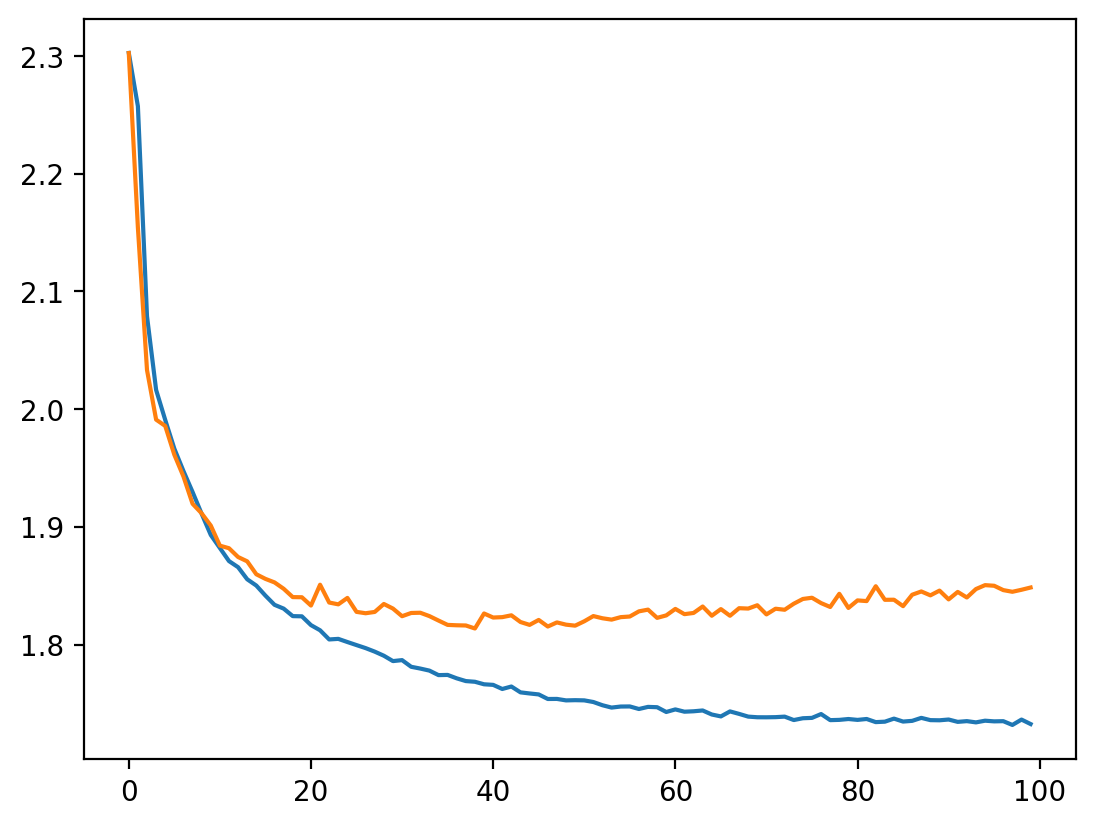

In [8]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)